# Individual Analysis for the X-Ray Spectra Experiment

In [1]:
import numpy as np
import scipy.constants as const
import uncertainties as unc
import uncertainties.unumpy as up
import matplotlib.pyplot as plt
import pandas as pd
from lmfit.models import LinearModel
%matplotlib inline

In [2]:
Pe = pd.read_csv('Lab 2 data - Sheet1 (1).csv')
Pe

,Element,Z,Ka,WKa,Kb,WKb,La,WLa,Lb,WLb
0,Na_Cl,17,317.82,23.0053,0.00,0.0000,0.00,0.0000,0.00,0.0000
1,Ti,22,539.92,24.4119,591.27,22.4964,0.00,0.0000,0.00,0.0000
2,Cr,24,645.91,25.4554,708.35,18.3291,0.00,0.0000,0.00,0.0000
3,Fe,26,761.86,27.3514,838.08,25.4898,0.00,0.0000,0.00,0.0000
4,Ni,28,888.55,27.1190,980.67,26.0166,0.00,0.0000,0.00,0.0000
5,Cu,29,954.94,28.4411,1055.79,26.7019,0.00,0.0000,0.00,0.0000
6,Zn,30,1023.97,28.4011,1134.60,25.3488,0.00,0.0000,0.00,0.0000
7,Ag,47,2603.22,38.0495,2931.29,27.0510,367.45,29.9904,0.00,0.0000
8,Cd,48,2719.35,41.3922,3070.61,22.5179,387.68,28.2551,0.00,0.0000
9,Sn,50,2963.49,45.5379,3346.95,33.3083,414.33,19.7252,440.84,5.8144


In [3]:
Peaks_Ka = up.uarray(Pe['Ka'][Pe['Ka'] > 0],Pe['WKa'][Pe['WKa'] > 0])
Peaks_Kb = up.uarray(Pe['Kb'][Pe['Kb'] > 0],Pe['WKb'][Pe['WKb'] > 0])
Peaks_La = up.uarray(Pe['La'][Pe['La'] > 0],Pe['WLa'][Pe['WLa'] > 0])
Peaks_Lb = up.uarray(Pe['Lb'][Pe['Lb'] > 0],Pe['WLb'][Pe['WLb'] > 0])

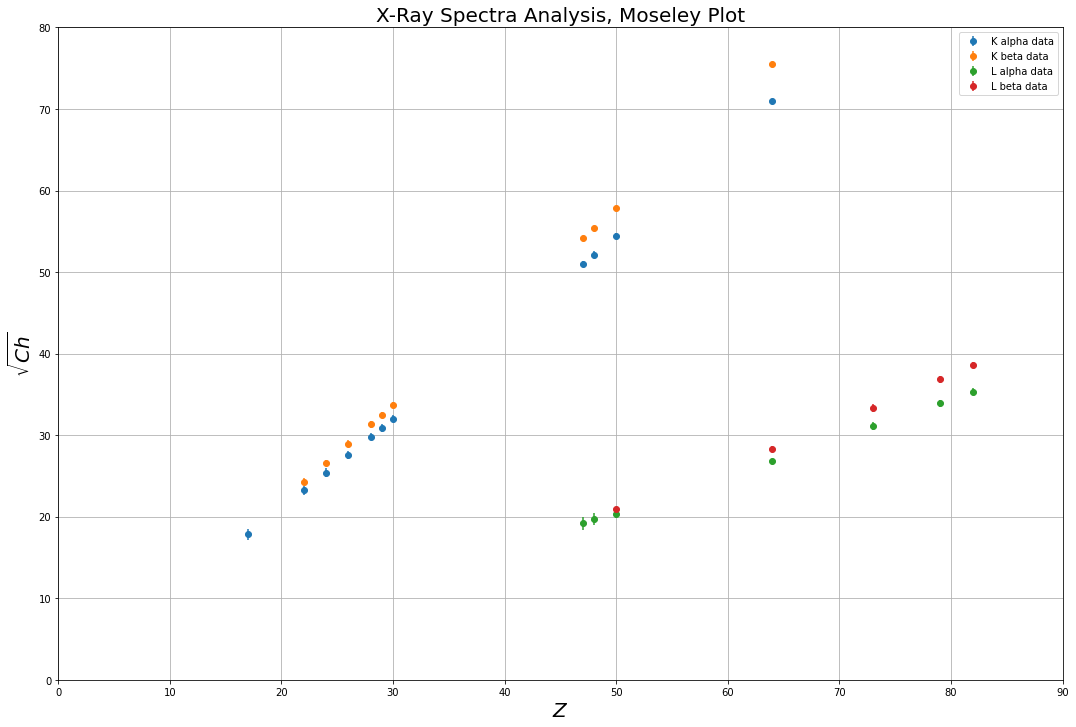

In [4]:
Kaxdata = Pe['Z'][Pe['Z'] < 65]
Kaydata = up.sqrt(Peaks_Ka)

Kbxdata = Pe['Z']
Kbydata = up.sqrt(Peaks_Kb)

Laxdata = Pe['Z']
Laydata = up.sqrt(Peaks_La)

Lbxdata = Pe['Z']
Lbydata = up.sqrt(Peaks_Lb)

plt.figure(figsize=(18,12))
plt.grid()
plt.title('X-Ray Spectra Analysis, Moseley Plot',fontsize=20)
plt.ylabel(r'$\sqrt{Ch}$',fontsize=20)
plt.xlabel(r'$Z$',fontsize=20)
plt.xlim(0,90)
plt.ylim(0,80)

plt.errorbar(Kaxdata,up.nominal_values(Kaydata),fmt='o',
             yerr=up.std_devs(Kaydata),label='K alpha data');
plt.errorbar(Kbxdata[1:11],up.nominal_values(Kbydata),fmt='o',
             yerr=up.std_devs(Kbydata),label='K beta data');

plt.errorbar(Laxdata[7:14],up.nominal_values(Laydata),fmt='o',
             yerr=up.std_devs(Laydata),label='L alpha data');
plt.errorbar(Lbxdata[9:14],up.nominal_values(Lbydata),fmt='o',
             yerr=up.std_devs(Lbydata),label='L beta data');
plt.legend();

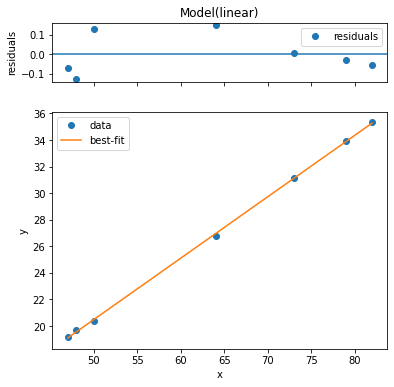

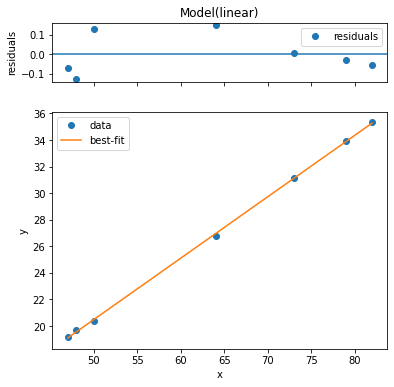

In [5]:
La_data = np.array([
    [367.45,47],
    [387.68,48],
    [414.33,50],
    [718.38,64],
    [967.36,73],
    [1149.87,79],
    [1247.64,82]])
    
La_guess = np.sqrt(La_data[:,0])
ZL_start = La_data[:,1]

line = LinearModel()
param_guess = line.guess(La_guess, x = ZL_start)
L_line_fit = line.fit(La_guess, param_guess, x = ZL_start)

L_line_fit.plot();

sigma_L = unc.ufloat(L_line_fit.params['slope'].value,L_line_fit.params['slope'].stderr)

Lb_data = np.array([
    [440.84, 50],
    [803.94, 64],
    [1111.43, 73],
    [1356.82, 79],
    [1491.34, 82],])

Lb_guess = np.sqrt(Lb_data[:,0])
ZL_start = Lb_data[:,1]

line = LinearModel()
param_guess = line.guess(Lb_guess, x = ZL_start)
Lb_line_fit = line.fit(Lb_guess, param_guess, x = ZL_start)

L_line_fit.plot();

sigma_L = unc.ufloat(L_line_fit.params['slope'].value,L_line_fit.params['slope'].stderr)

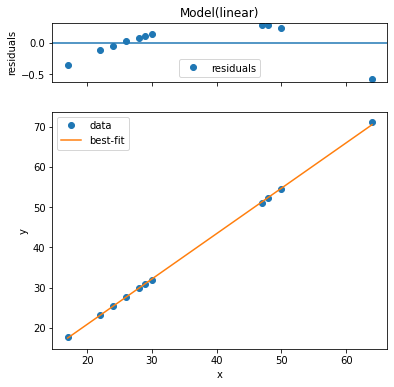

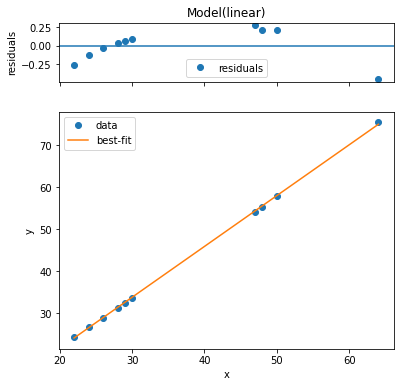

In [6]:
Ka_data = np.array([
    [317.82,17],
    [539.92,22],
    [645.91,24],
    [761.86,26],
    [888.55,28],
    [954.94,29],
    [1023.97,30],
    [2603.22,47],
    [2719.35,48],
    [2963.49,50],
    [5045.33,64]])

Ka_guess = np.sqrt(Ka_data[:,0])
ZK_start = Ka_data[:,1]

line = LinearModel()
param_guess = line.guess(Ka_guess, x = ZK_start)
K_line_fit = line.fit(Ka_guess, param_guess, x = ZK_start)

K_line_fit.plot();

sigma_K = unc.ufloat(K_line_fit.params['slope'].value,K_line_fit.params['slope'].stderr)

Kb_data = np.array([
    [591.27, 22],
    [708.35, 24],
    [838.08, 26],
    [980.67, 28],
    [1055.79, 29],
    [1134.6, 30],
    [2931.29, 47],
    [3070.61, 48],
    [3346.95, 50],
    [5701.84, 64]])

Kb_guess = np.sqrt(Kb_data[:,0])
ZK_start = Kb_data[:,1]

line = LinearModel()
param_guess = line.guess(Kb_guess, x = ZK_start)
Kb_line_fit = line.fit(Kb_guess, param_guess, x = ZK_start)

Kb_line_fit.plot();

sigma_Kb = unc.ufloat(Kb_line_fit.params['slope'].value,Kb_line_fit.params['slope'].stderr)

In [7]:
print('Screening constant for K-alpha1 = {:.2uP}'.format(sigma_K))
print('Screening constant for L-alpha = {:.2uP}'.format(sigma_L))

Screening constant for K-alpha1 = 1.1271±0.0060
Screening constant for L-alpha = 0.4619±0.0031


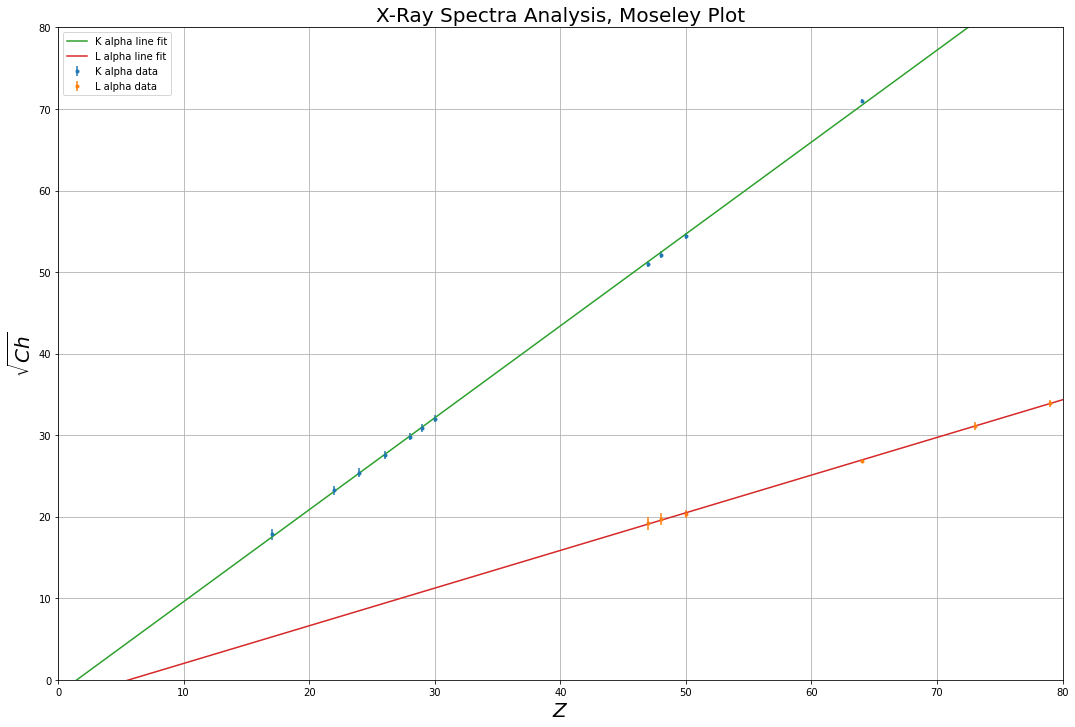

In [8]:
xfit = np.linspace(0,100,10)
Kyfit = K_line_fit.eval(K_line_fit.params, x=xfit)
Lyfit = L_line_fit.eval(L_line_fit.params, x=xfit)

plt.figure(figsize=(18,12))
plt.grid()
plt.title('X-Ray Spectra Analysis, Moseley Plot',fontsize=20)
plt.ylabel(r'$\sqrt{Ch}$',fontsize=20)
plt.xlabel(r'$Z$',fontsize=20)
plt.xlim(0,80)
plt.ylim(0,80)
plt.errorbar(Kaxdata,up.nominal_values(Kaydata),fmt='.',
             yerr=up.std_devs(Kaydata),label='K alpha data');
plt.errorbar(Laxdata[7:14],up.nominal_values(Laydata),fmt='.',
             yerr=up.std_devs(Laydata),label='L alpha data');

plt.plot(xfit,Kyfit,label='K alpha line fit')
plt.plot(xfit,Lyfit,label='L alpha line fit')
plt.legend();

In [9]:
Unknown = pd.read_csv('Lab 2 Unknown - Sheet2.csv')
Unknown

,U1,U2,U3,U4,U5,U6
0,646.49,888.35,1170.29,2056.84,2841.97,996.70
1,709.04,981.11,1301.15,2308.58,413.18,1153.69
2,0.00,0.00,0.00,0.00,3207.99,0.00
3,0.00,0.00,0.00,0.00,0.00,0.00


In [10]:
Unknown['Z1'] = [24,24,0,0]
Unknown['Z2'] = [30,30,0,0]
Unknown['Z3'] = [32,32,32,32]
Unknown['Z4'] = [34,34,0,0]
Unknown['Z5'] = [49,49,49,49]
Unknown['Z6'] = [26,26,0,0]
Unknown

,U1,U2,U3,U4,U5,U6,Z1,Z2,Z3,Z4,Z5,Z6
0,646.49,888.35,1170.29,2056.84,2841.97,996.70,24,30,32,34,49,26
1,709.04,981.11,1301.15,2308.58,413.18,1153.69,24,30,32,34,49,26
2,0.00,0.00,0.00,0.00,3207.99,0.00,0,0,32,0,49,0
3,0.00,0.00,0.00,0.00,0.00,0.00,0,0,32,0,49,0


In [11]:
Pe['EKa'] = [2.62, 4.51, 5.41, 6.40, 7.48, 8.05, 8.64, 22.16, 23.17, 25.27, 42.98, 57.52, 68.79, 74.96]
Pe['ELa'] = [0, 0.45, 0.57, 0.70, 0.85, 0.93, 1.01, 2.98, 3.13, 3.44, 6.06, 8.15, 9.71, 10.55]

In [12]:
print('Collected Known data. Energy column in keV.')
Pe

Collected Known data. Energy column in keV.


,Element,Z,Ka,WKa,Kb,WKb,La,WLa,Lb,WLb,EKa,ELa
0,Na_Cl,17,317.82,23.0053,0.00,0.0000,0.00,0.0000,0.00,0.0000,2.62,0.00
1,Ti,22,539.92,24.4119,591.27,22.4964,0.00,0.0000,0.00,0.0000,4.51,0.45
2,Cr,24,645.91,25.4554,708.35,18.3291,0.00,0.0000,0.00,0.0000,5.41,0.57
3,Fe,26,761.86,27.3514,838.08,25.4898,0.00,0.0000,0.00,0.0000,6.40,0.70
4,Ni,28,888.55,27.1190,980.67,26.0166,0.00,0.0000,0.00,0.0000,7.48,0.85
5,Cu,29,954.94,28.4411,1055.79,26.7019,0.00,0.0000,0.00,0.0000,8.05,0.93
6,Zn,30,1023.97,28.4011,1134.60,25.3488,0.00,0.0000,0.00,0.0000,8.64,1.01
7,Ag,47,2603.22,38.0495,2931.29,27.0510,367.45,29.9904,0.00,0.0000,22.16,2.98
8,Cd,48,2719.35,41.3922,3070.61,22.5179,387.68,28.2551,0.00,0.0000,23.17,3.13
9,Sn,50,2963.49,45.5379,3346.95,33.3083,414.33,19.7252,440.84,5.8144,25.27,3.44


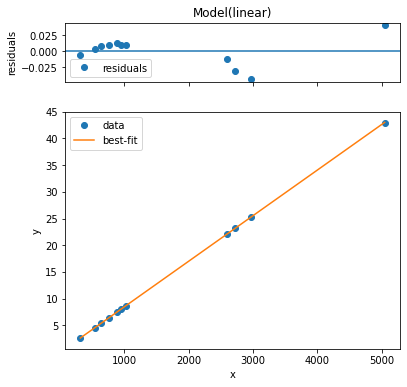

In [13]:
Ka_guess = Pe['Ka']
Ka_energy = Pe['EKa']

line = LinearModel()
param_guess = line.guess(Ka_energy[0:11], x = Ka_guess[0:11])
Ka_energy_line_fit = line.fit(Ka_energy[0:11], param_guess, x = Ka_guess[0:11])

Ka_energy_line_fit.plot();

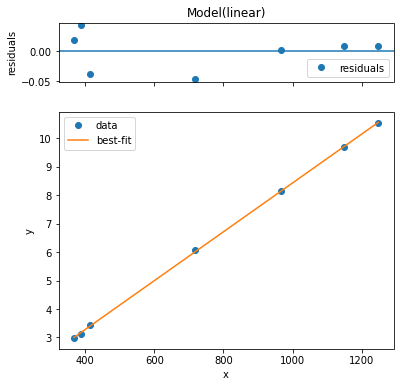

In [14]:
La_guess = Pe['La']
La_energy = Pe['ELa']

line = LinearModel()
param_guess = line.guess(La_energy[7:14], x = La_guess[7:14])
La_energy_line_fit = line.fit(La_energy[7:14], param_guess, x = La_guess[7:14])

La_energy_line_fit.plot();

In [15]:
EKa_slope = unc.ufloat(Ka_energy_line_fit.params['slope'].value,Ka_energy_line_fit.params['slope'].stderr)
EKa_intercept = unc.ufloat(Ka_energy_line_fit.params['intercept'].value,Ka_energy_line_fit.params['intercept'].stderr)

def EKa_Energy_from_Channel(channel_number):
    Energy = (channel_number*EKa_slope) + EKa_intercept
    return Energy

print(EKa_Energy_from_Channel(6100))
Al_energy = pd.DataFrame()
Al_energy['Al Energy'] = [1.49, 1.55, 0]
Al_energy['Al Channel Number'] = (Al_energy['Al Energy'] - EKa_intercept)/EKa_slope
Al_energy['Co Energy'] = [136, 122, 14]
Al_energy['Co Channel Number'] = (Al_energy['Co Energy'] - EKa_intercept)/EKa_slope
Al_energy

52.034+/-0.033


,Al Energy,Al Channel Number,Co Energy,Co Channel Number
0,1.49,186.3+/-1.3,136,15924+/-10
1,1.55,193.3+/-1.3,122,14286+/-9
2,0.00,11.9+/-1.3,14,1650.0+/-1.6


In [16]:
ELa_slope = unc.ufloat(La_energy_line_fit.params['slope'].value,La_energy_line_fit.params['slope'].stderr)
ELa_intercept = unc.ufloat(La_energy_line_fit.params['intercept'].value,La_energy_line_fit.params['intercept'].stderr)

def ELa_Energy_from_Channel(channel_number):
    Energy = (channel_number*ELa_slope) + ELa_intercept
    return Energy

In [17]:
test_table = pd.DataFrame()
test_table['Element'] = Pe['Element']
test_table['Channel Number Ka'] = Pe['Ka']
test_table['Ka Energy'] = EKa_Energy_from_Channel(Pe['Ka'])
test_table['Known Ka Energy'] = Pe['EKa']
test_table['Channel Number La'] = Pe['La']
test_table['La Energy'] = ELa_Energy_from_Channel(Pe['La'])
test_table['Known La Energy'] = Pe['ELa']
test_table

,Element,Channel Number Ka,Ka Energy,Known Ka Energy,Channel Number La,La Energy,Known La Energy
0,Na_Cl,317.82,2.614+/-0.011,2.62,0.00,-0.156+/-0.031,0.00
1,Ti,539.92,4.513+/-0.012,4.51,0.00,-0.156+/-0.031,0.45
2,Cr,645.91,5.418+/-0.012,5.41,0.00,-0.156+/-0.031,0.57
3,Fe,761.86,6.409+/-0.012,6.40,0.00,-0.156+/-0.031,0.70
4,Ni,888.55,7.492+/-0.012,7.48,0.00,-0.156+/-0.031,0.85
5,Cu,954.94,8.060+/-0.012,8.05,0.00,-0.156+/-0.031,0.93
6,Zn,1023.97,8.650+/-0.012,8.64,0.00,-0.156+/-0.031,1.01
7,Ag,2603.22,22.147+/-0.017,22.16,367.45,3.000+/-0.034,2.98
8,Cd,2719.35,23.140+/-0.018,23.17,387.68,3.173+/-0.034,3.13
9,Sn,2963.49,25.227+/-0.019,25.27,414.33,3.402+/-0.035,3.44


In [18]:
search_table = pd.read_csv('Lab 2 Unknown - Sheet2.csv')
search_table['Energy 1'] = EKa_Energy_from_Channel(search_table['U1'][search_table['U1'] > 0])
search_table['Z1'] = [24,24,0,0] #24 Chromium
search_table['Energy 2'] = EKa_Energy_from_Channel(search_table['U2'][search_table['U2'] > 0])
search_table['Z2'] = [28,28,0,0] #28 Nickel
search_table['Energy 3'] = EKa_Energy_from_Channel(search_table['U3'][search_table['U3'] > 0])
search_table['Z3'] = [32,32,0,0] #32 Germanium
search_table['Energy 4'] = EKa_Energy_from_Channel(search_table['U4'][search_table['U4'] > 0])
search_table['Z4'] = [42,42,0,0] #42 Molybdenum
search_table['Energy 5'] = EKa_Energy_from_Channel(search_table['U5'][search_table['U5'] > 0])
search_table['Z5'] = [49,49,49,0] #49 Indium
search_table['Energy 6'] = EKa_Energy_from_Channel(search_table['U6'][search_table['U6'] > 0])
search_table['Z6'] = [74,74,0,0] #74 Tungsten
search_table['ZAl'] = [13,13,0,0] #13 Al Ka1 = 1.49 Kb1 = 1.55
search_table

,U1,U2,U3,U4,U5,U6,Energy 1,Z1,Energy 2,Z2,Energy 3,Z3,Energy 4,Z4,Energy 5,Z5,Energy 6,Z6,ZAl
0,646.49,888.35,1170.29,2056.84,2841.97,996.70,5.423+/-0.012,24,7.491+/-0.012,28,9.900+/-0.013,32,17.478+/-0.015,42,24.188+/-0.018,49,8.417+/-0.012,74,13
1,709.04,981.11,1301.15,2308.58,413.18,1153.69,5.958+/-0.012,24,8.283+/-0.012,28,11.019+/-0.013,32,19.629+/-0.016,42,3.429+/-0.011,49,9.758+/-0.013,74,13
2,0.00,0.00,0.00,0.00,3207.99,0.00,NaN,0,NaN,0,NaN,0,NaN,0,27.316+/-0.020,49,NaN,0,0
3,0.00,0.00,0.00,0.00,0.00,0.00,NaN,0,NaN,0,NaN,0,NaN,0,NaN,0,NaN,0,0


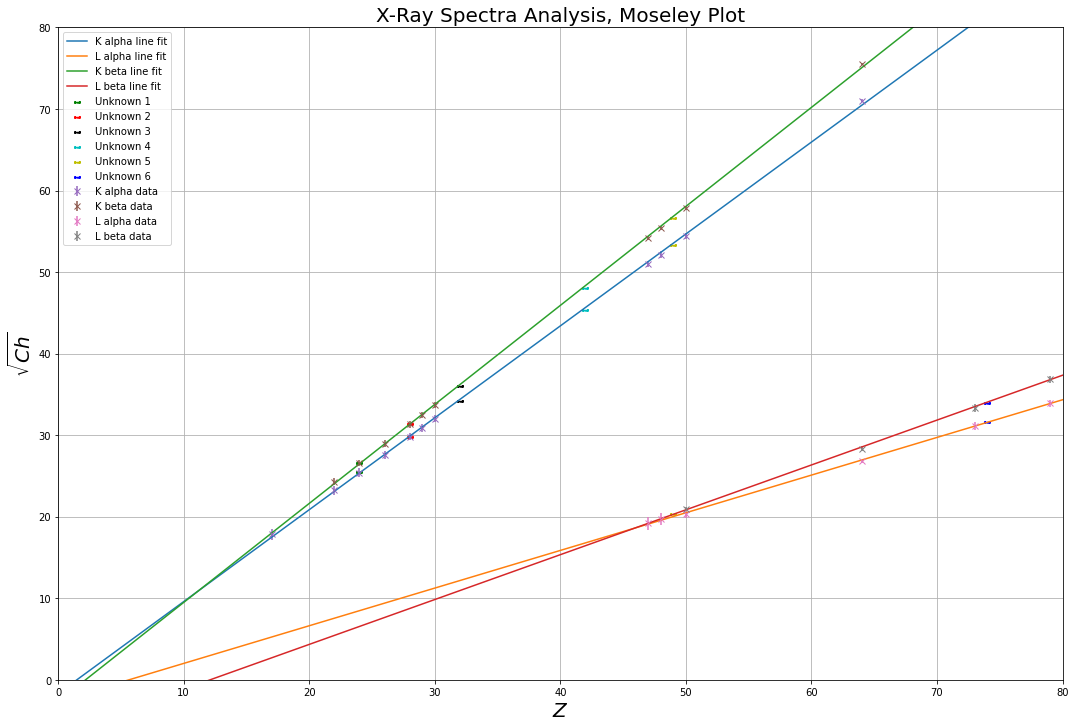

In [19]:
xfit = np.linspace(0,100,10)
xfit2 = np.linspace(0,100,4)
Kyfit = K_line_fit.eval(K_line_fit.params, x=xfit)
Lyfit = L_line_fit.eval(L_line_fit.params, x=xfit)
Kbyfit = Kb_line_fit.eval(Kb_line_fit.params, x=xfit)
Lbyfit = Lb_line_fit.eval(Lb_line_fit.params, x=xfit)

plt.figure(figsize=(18,12))
plt.grid()
plt.title('X-Ray Spectra Analysis, Moseley Plot',fontsize=20)
plt.ylabel(r'$\sqrt{Ch}$',fontsize=20)
plt.xlabel(r'$Z$',fontsize=20)
plt.xlim(0,80)
plt.ylim(0,80)

plt.plot(xfit,Kyfit,label='K alpha line fit')
plt.plot(xfit,Lyfit,label='L alpha line fit')
plt.plot(xfit,Kbyfit,label='K beta line fit')
plt.plot(xfit,Lbyfit,label='L beta line fit')

plt.errorbar(Kaxdata,up.nominal_values(Kaydata),fmt='x',
             yerr=up.std_devs(Kaydata),label='K alpha data')
plt.errorbar(Kbxdata[1:11],up.nominal_values(Kbydata),fmt='x',
             yerr=up.std_devs(Kbydata),label='K beta data')

plt.errorbar(Laxdata[7:14],up.nominal_values(Laydata),fmt='x',
             yerr=up.std_devs(Laydata),label='L alpha data')
plt.errorbar(Lbxdata[9:14],up.nominal_values(Lbydata),fmt='x',
             yerr=up.std_devs(Lbydata),label='L beta data')

plt.scatter(search_table['Z1'][search_table['Z1'] > 0],np.sqrt(Unknown['U1'][Unknown['U1'] > 0]), label = 'Unknown 1', color = 'g', marker='$8=D$', )
plt.scatter(search_table['Z2'][search_table['Z2'] > 0],np.sqrt(Unknown['U2'][Unknown['U2'] > 0]), label = 'Unknown 2', color = 'r', marker='$8=D$')
plt.scatter(search_table['Z3'][search_table['Z3'] > 0],np.sqrt(Unknown['U3'][Unknown['U3'] > 0]), label = 'Unknown 3', color = 'k', marker='$8=D$')
plt.scatter(search_table['Z4'][search_table['Z4'] > 0],np.sqrt(Unknown['U4'][Unknown['U4'] > 0]), label = 'Unknown 4', color = 'c', marker='$8=D$')
plt.scatter(search_table['Z5'][search_table['Z5'] > 0],np.sqrt(Unknown['U5'][Unknown['U5'] > 0]), label = 'Unknown 5', color = 'y', marker='$8=D$')
plt.scatter(search_table['Z6'][search_table['Z6'] > 0],np.sqrt(Unknown['U6'][Unknown['U6'] > 0]), label = 'Unknown 6', color = 'b', marker='$8=D$')

plt.legend();